In [1]:
%config Completer.use_jedi = False

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import sklearn.externals
import joblib

In [3]:
df_diabetes = pd.read_csv("scoring/diabetes.csv")
df_patient = pd.read_csv("scoring/patient_data.csv")
df_pregnancies = pd.read_csv("scoring/pregnancies_records.csv")

In [4]:
pregnancies_sum = df_pregnancies.groupby("PatientID", as_index=False).agg({"PregnancyRecordID": "count"})
pregnancies_sum.columns=["PatientID", "PregnanciesCount"]

In [5]:
combined = pd.merge(pd.merge(df_diabetes, df_patient, on="PatientID", how="left"), pregnancies_sum, on="PatientID", how="left")

In [6]:
combined.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,BirthYear,city,state,country,PregnanciesCount
0,129,80,0,0,31.2,0.703,18022,1992,Lewiston,Maine,United States,NaN
1,159,64,0,0,27.4,0.294,18024,1981,West Mifflin,Pennsylvania,United States,7.0
2,137,61,0,0,24.2,0.151,18051,1966,Saint George,Utah,United States,6.0
3,113,50,10,85,29.5,0.626,18114,1996,Grand Forks,North Dakota,United States,3.0
4,105,90,0,0,29.6,0.197,18147,1975,Rancho Palos Verdes,California,United States,NaN


In [7]:
combined.rename(columns={"city": "City", "state": "State", "country": "Country"}, inplace=True)

In [8]:
year = date.today().year
print(f"year={year}")
combined['Age']=year-combined['BirthYear']
combined.head()

year=2021


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PatientID,BirthYear,City,State,Country,PregnanciesCount,Age
0,129,80,0,0,31.2,0.703,18022,1992,Lewiston,Maine,United States,NaN,29
1,159,64,0,0,27.4,0.294,18024,1981,West Mifflin,Pennsylvania,United States,7.0,40
2,137,61,0,0,24.2,0.151,18051,1966,Saint George,Utah,United States,6.0,55
3,113,50,10,85,29.5,0.626,18114,1996,Grand Forks,North Dakota,United States,3.0,25
4,105,90,0,0,29.6,0.197,18147,1975,Rancho Palos Verdes,California,United States,NaN,46


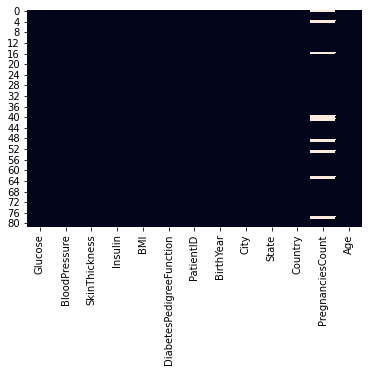

In [9]:
sns.heatmap(combined.isnull(), cbar=False)

In [10]:
combined["PregnanciesCount"].fillna(0, inplace=True)

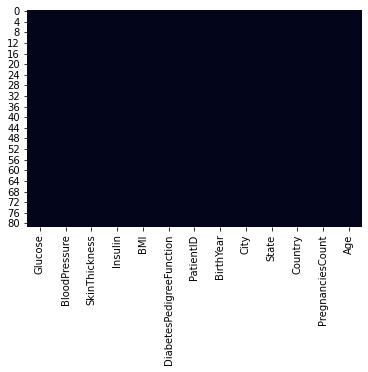

In [11]:
sns.heatmap(combined.isnull(), cbar=False)

In [14]:
#############################
# Save the result set to feature store
#############################
selected_features = ['PatientID', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                   'BMI', 'DiabetesPedigreeFunction', 'PregnanciesCount', 'Age']

In [15]:
df = combined[selected_features]

In [16]:
df.shape

(82, 9)

In [17]:
df.to_csv('feature_store/feature_data_m3.csv', index=False)

In [19]:
############################
# Start modeling
############################
df = pd.read_csv('feature_store/feature_data_m3.csv')
print(f"shape={df.shape}")
df.head()

shape=(82, 9)


,PatientID,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,PregnanciesCount,Age
0,18022,129,80,0,0,31.2,0.703,0.0,29
1,18024,159,64,0,0,27.4,0.294,7.0,40
2,18051,137,61,0,0,24.2,0.151,6.0,55
3,18114,113,50,10,85,29.5,0.626,3.0,25
4,18147,105,90,0,0,29.6,0.197,0.0,46


In [22]:
pipeline = joblib.load('models/pipeline_fs_v1.pkl')

In [24]:
predictions = pipeline.predict(df)

In [25]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [26]:
pipeline_v2 = joblib.load('models/pipeline_fs_v2.pkl')

In [27]:
predictions_v2 = pipeline_v2.predict(df)

In [28]:
predictions_v2

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])